In [1]:
import numpy as np
from sklearn import preprocessing
import pycasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn import linear_model
import time
import os

import pdb
from sklearn.metrics import accuracy_score

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "pic")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ridge Penalized Logistic Regression $1d$

In [61]:
def LR_function_1d(x,a,b,labd):
    return np.log(1+np.exp(np.dot(x,a))) -b*np.dot(x,a) + labd*np.square(x)

## $\lambda = 1$

### $b = 1$ 

In [108]:
a = -0.5
b1 = 1.
b2 = 0.
labd = 1

In [109]:
x = np.arange(-2., 2., 0.01)

In [110]:
y = LR_function_1d(x,a,b1,labd)
y2 = LR_function_1d(x,a,b2,labd)

In [111]:
print(y[0],y[-1])

4.313261687518223 5.269708854166201


In [112]:
print(y2[0], y2[-1])

5.313261687518223 4.2747088541661995


Saving figure PRLR_cost_function_a-0.5labd1


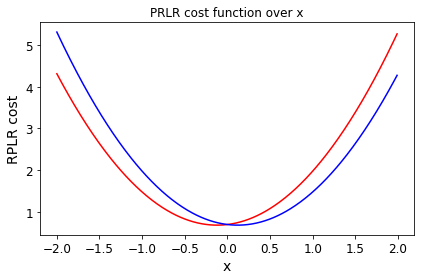

In [115]:
plt.plot(x,y,'r-', x,y2,'b-')
plt.xlabel('x')
plt.ylabel('RPLR cost')
plt.title('PRLR cost function over x')
save_fig('PRLR_cost_function_a'+str(a)+'labd'+str(labd))
plt.show()

## $\lambda = 10^6$

In [98]:
1e6

1000000.0

In [116]:
labd = 1e6
x = np.arange(-2., 2., 0.01)
y = LR_function_1d(x,a,b1,labd)
y2 = LR_function_1d(x,a,b2,labd)

In [118]:
print(y[0], y[-1])
print(y2[0], y2[-1])

4000000.3132616873 3960101.3096088693
4000001.3132616873 3960100.314608869


Saving figure PRLR_cost_function_a-0.5labd1000000.0


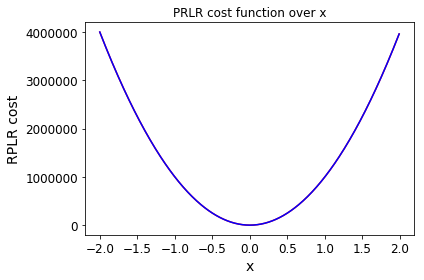

In [117]:
plt.plot(x,y,'r-', x,y2,'b-')
plt.xlabel('x')
plt.ylabel('RPLR cost')
plt.title('PRLR cost function over x')
save_fig('PRLR_cost_function_a'+str(a)+'labd'+str(labd))
plt.show()

## $\lambda = 0$

In [121]:
labd = 0.
x = np.arange(-2., 2., 0.01)
y = LR_function_1d(x,a,b1,labd)
y2 = LR_function_1d(x,a,b2,labd)

Saving figure PRLR_cost_function_a-0.5labd0.0


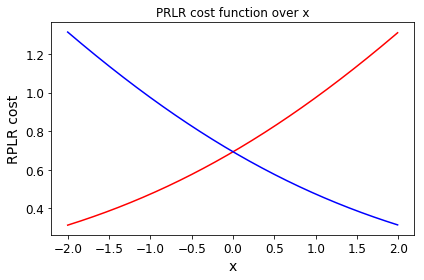

In [122]:
plt.plot(x,y,'r-', x,y2,'b-')
plt.xlabel('x')
plt.ylabel('RPLR cost')
plt.title('PRLR cost function over x')
save_fig('PRLR_cost_function_a'+str(a)+'labd'+str(labd))
plt.show()

Conclusion:
* $\lambda = 1 = \frac{1}{\sqrt{n}}$ is the parameter used in paper. This gives two almost quadratic function but with minimal point a little bit away from origin. Two strongly convex functions. 
* $\lambda = 10^6$, the ridge pelnalized function is more like quadratic function compared to case 1. 
* $\lambda = 0$, this gives two logistic regression cost function which has been shown in notes. Not necessary to be strongly convex but convex. 